/root/autodl-tmp/conda/envs/torch_py38/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


sys.path: ['/root/autodl-tmp/conda/envs/torch_py38/lib/python38.zip', '/root/autodl-tmp/conda/envs/torch_py38/lib/python3.8', '/root/autodl-tmp/conda/envs/torch_py38/lib/python3.8/lib-dynload', '', '/root/.local/lib/python3.8/site-packages', '/root/autodl-tmp/conda/envs/torch_py38/lib/python3.8/site-packages', '/root/autodl-tmp/conda/envs/torch_py38/lib/python3.8/site-packages/molsets-1.0-py3.8.egg', '/root/autodl-tmp/conda/envs/torch_py38/lib/python3.8/site-packages/pomegranate-1.1.2-py3.8.egg', '/root/autodl-tmp/conda/envs/torch_py38/lib/python3.8/site-packages/fcd_torch-1.0.7-py3.8.egg', '/root/autodl-tmp/conda/envs/torch_py38/lib/python3.8/site-packages/apricot_select-0.6.1-py3.8.egg', '/root/autodl-tmp/conda/envs/torch_py38/lib/python3.8/site-packages/setuptools/_vendor']
os.getcwdb(): b'/root/autodl-tmp/GraphSpectualDiffsion'
335


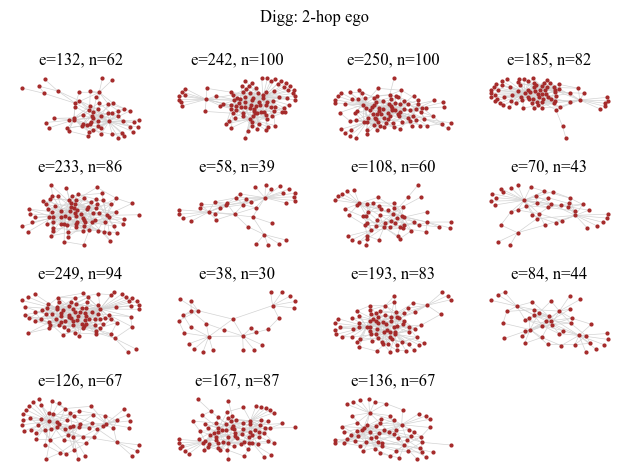

In [1]:
import utils
from utils.plot import save_graph_list, plot_graphs_list
from utils.loader import load_data
from parsers.parser import Parser
from parsers.config import get_config
import pickle

graph_name = "Digg"
with open(f"data/{graph_name}.pkl", 'rb') as f:
    graph_list = pickle.load(f)
print(len(graph_list))
plot_graphs_list(graphs=graph_list[:15], title=f'{graph_name}: 2-hop ego', max_num=16)


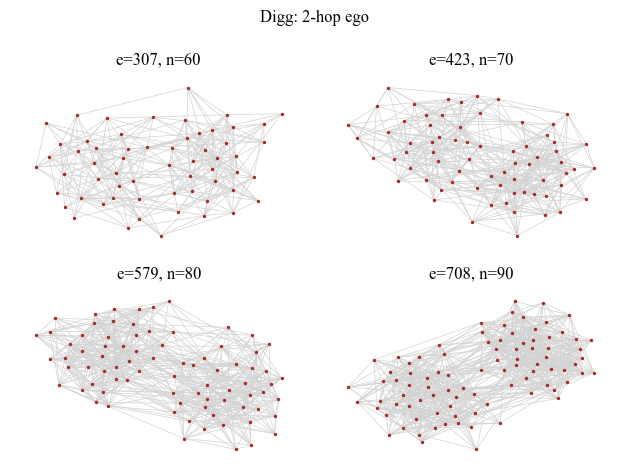

In [7]:
import networkx as nx
import random

ER_graphs = []
BA_graphs = []
SB_graphs = []


# Parameters
node_counts = [60, 70, 80, 90, 100]
num_graphs = 1

# ER parameters
p_er = 0.1  # Probability for edge creation

# BA parameters
m_ba = 2    # Number of edges to attach from a new node to existing nodes

# SBM parameters
def get_sbm_sizes(n):
    # Example: 2 equal-sized communities
    return [n // 2, n - n // 2]

p_intra = 0.3  # Probability of edges within communities
p_inter = 0.05 # Probability of edges between communities

for n in node_counts:
    # ER graphs
    for i in range(num_graphs):
        G_er = nx.erdos_renyi_graph(n, p_er, seed=random.randint(0, 10000))
        ER_graphs.append(G_er)
    # BA graphs
    for i in range(num_graphs):
        G_ba = nx.barabasi_albert_graph(n, m_ba, seed=random.randint(0, 10000))
        BA_graphs.append(G_ba)
    # SBM graphs
    sizes = get_sbm_sizes(n)
    p_matrix = [
        [p_intra, p_inter],
        [p_inter, p_intra]
    ]
    for i in range(num_graphs):
        G_sbm = nx.stochastic_block_model(sizes, p_matrix, seed=random.randint(0, 10000))
        SB_graphs.append(G_sbm)

options = {
    'node_size': 4,
    'node_color' : 'brown',
    'edge_color' : 'lightgray',
    'linewidths': 1,
    'width': 0.5
}

plot_graphs_list(graphs=SB_graphs[:4], title=f'{graph_name}: 2-hop ego', max_num=16)
plot_graphs_list(graphs=SB_graphs[:4], title=f'{graph_name}: 2-hop ego', max_num=16)
plot_graphs_list(graphs=SB_graphs[:4], title=f'{graph_name}: 2-hop ego', max_num=16)


In [ ]:
# mmd


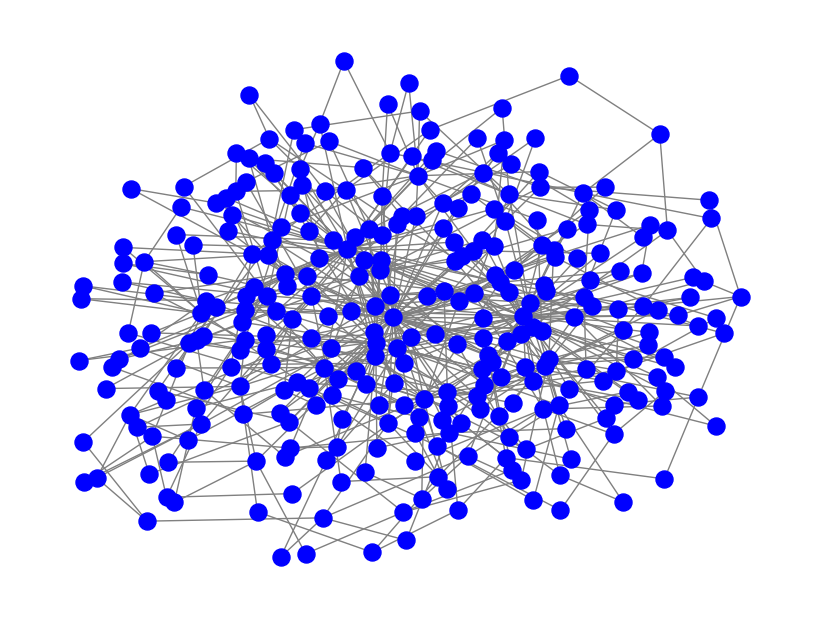

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

# Parameters
n = 100 # number of nodes
m = 2   # number of edges to attach from a new node to existing nodes

# Generate BA graph
G = nx.barabasi_albert_graph(n, m, seed=42)


for i in range(1):
    # Draw the graph
    fig = plt.figure(figsize=(8, 6))
    fig.patch.set_alpha(0.)
    nx.draw(G, with_labels=False, node_color='blue', edge_color='grey', node_size=300)
    # plt.title("Barabási–Albert (BA) Graph with 30 Nodes")
    plt.savefig(f"large_{i}.png")
    plt.show()